<a href="https://colab.research.google.com/github/TejaswiniU/INSE6220/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import required libraries**


In [46]:
!pip install pycaret==2.3.6

     |████████████████████████████████| 301 kB 4.9 MB/s 
     |████████████████████████████████| 261 kB 59.3 MB/s 
     |████████████████████████████████| 6.8 MB 49.5 MB/s 
     |████████████████████████████████| 1.7 MB 42.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.8 MB 39.0 MB/s 
     |████████████████████████████████| 116 kB 56.0 MB/s 
     |████████████████████████████████| 88 kB 7.4 MB/s 
     |████████████████████████████████| 2.0 MB 41.0 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 167 kB 52.4 MB/s 
     |████████████████████████████████| 1.3 MB 27.5 MB/s 
     |████████████████████████████████| 303 kB 53.2 MB/s 
     |████████████████████████████████| 3.1 MB 36.1 MB/s 
     |████████████████████████████████| 690 kB 60.1 MB/s 
     |█████████████████

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset** : 

This dataset contains the information about the stress levels ranging from 0(low/normal) to 4 (high). For the purpose of this project considered below columns:

* t	- body temperature
* lm	- limb moment	
* bo	- body oxygen levels
* rem	- eye moment
* sr	- sleeping hours
* hr	- heart rate
* Sl  - stress level

Orginal dataset : https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep?select=SaYoPillow.csv

In [4]:
#reading the csv from github & considering 50 rows
df = pd.read_csv('https://raw.githubusercontent.com/TejaswiniU/INSE6220/main/dataset.csv',nrows=50)
df.head(5)

,t,lm,bo,rem,sr,hr,sl
0,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.552,15.880,89.552,98.88,1.552,72.76,3
2,96.000,10.000,95.000,85.00,7.000,60.00,1
3,90.768,13.920,88.768,96.92,0.768,68.84,3
4,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       50 non-null     float64
 1   lm      50 non-null     float64
 2   bo      50 non-null     float64
 3   rem     50 non-null     float64
 4   sr      50 non-null     float64
 5   hr      50 non-null     float64
 6   sl      50 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.9 KB


Check if there are any duplicates in considered dataset and drop if anythis is available.

In [6]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [7]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [8]:
df.loc[df.duplicated(), :]

,t,lm,bo,rem,sr,hr,sl


In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

**Exploratory Data Analysis**

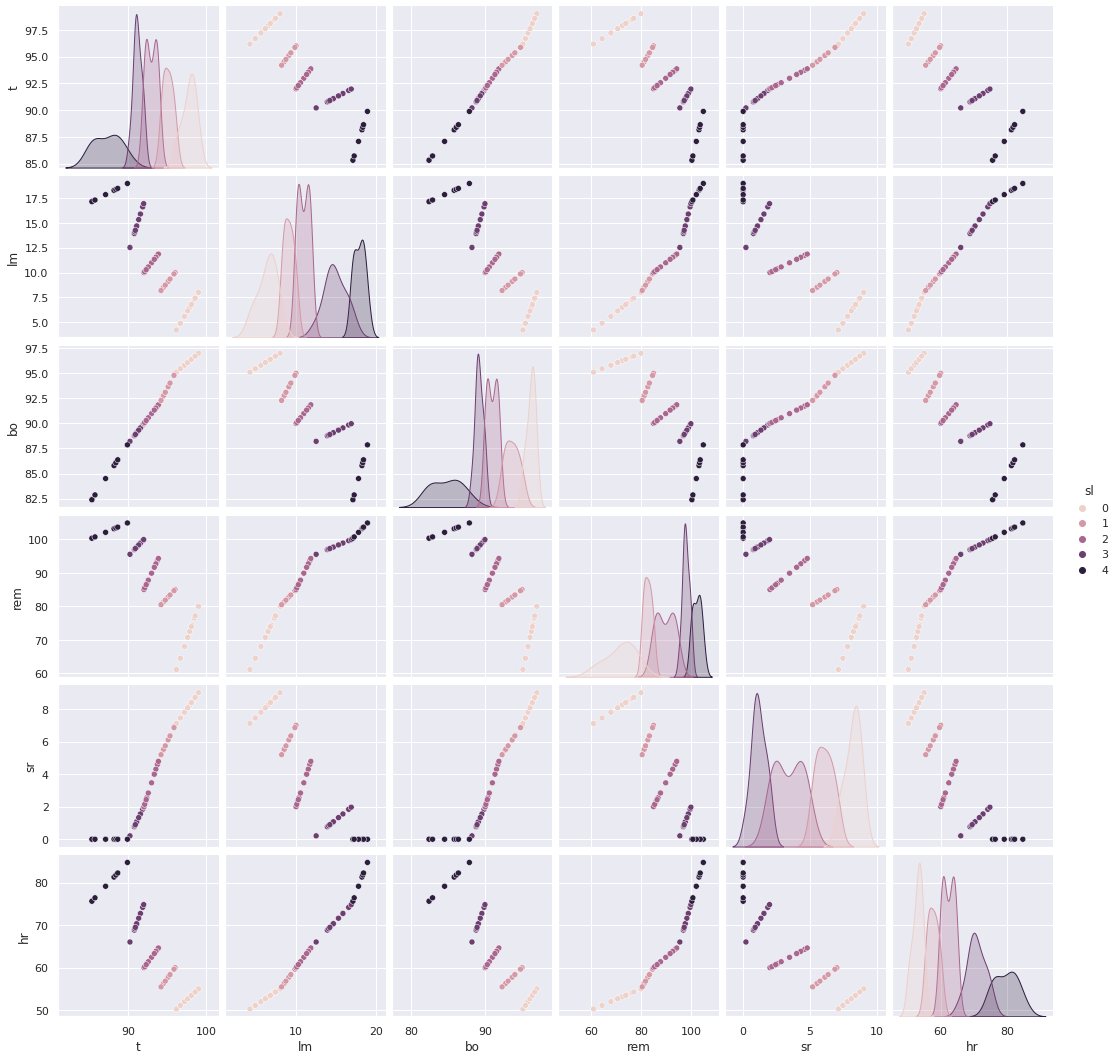

In [10]:
sns.pairplot(df, hue='sl')
plt.show()

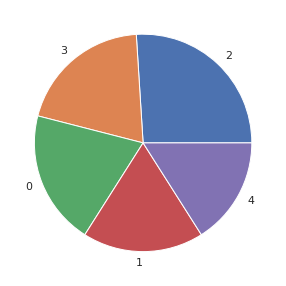

In [11]:
y =df['sl']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [12]:
df.sl.unique()

array([3, 1, 0, 2, 4])

**Data matrix for PCA**

In [13]:
X = df.drop(columns=['sl'])
X.head()


,t,lm,bo,rem,sr,hr
0,91.840,16.600,89.840,99.60,1.840,74.20
1,91.552,15.880,89.552,98.88,1.552,72.76
2,96.000,10.000,95.000,85.00,7.000,60.00
3,90.768,13.920,88.768,96.92,0.768,68.84
4,97.872,6.496,96.248,72.48,8.248,53.12


In [14]:
df.head(1)

,t,lm,bo,rem,sr,hr,sl
0,91.84,16.6,89.84,99.6,1.84,74.2,3


In [15]:
df.head(1)

,t,lm,bo,rem,sr,hr,sl
0,91.84,16.6,89.84,99.6,1.84,74.2,3


In [16]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
t,50.0,93.03040,3.495096,85.320,91.048,93.152,95.368,99.000
lm,50.0,11.59152,4.053671,4.224,8.580,10.768,14.660,18.952
bo,50.0,91.12192,3.835810,82.384,89.048,91.152,94.052,97.000
rem,50.0,88.50560,11.074474,61.120,81.450,88.840,97.660,104.880
sr,50.0,3.84096,3.025500,0.000,1.048,3.728,6.368,9.000
hr,50.0,64.06880,9.312859,50.280,56.450,61.920,70.320,84.760


**Standardize the Data**

In [17]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,t,lm,bo,rem,sr,hr
0,-0.344049,1.248086,-0.337591,1.011970,-0.668080,1.098917
1,-0.427287,1.068666,-0.413435,0.946296,-0.764237,0.942722
2,0.858274,-0.396598,1.021284,-0.319762,1.054739,-0.441337
3,-0.653879,0.580244,-0.619900,0.767515,-1.025998,0.517525
4,1.399319,-1.269776,1.349943,-1.461767,1.471421,-1.187601
5,0.677925,-0.552095,0.774791,-0.462056,0.846398,-0.610548
6,1.205098,-1.493054,1.231963,-1.870408,1.321842,-1.309086
7,1.725334,-0.894987,1.547980,-0.775834,1.722498,-0.983680
8,0.906829,-1.835946,1.050779,-2.497964,1.092133,-1.495651
9,0.599312,-0.619876,0.667345,-0.524082,0.755583,-0.684307


In [18]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
t,50.0,-4.325429e-15,1.010153,-2.228460,-0.572953,0.035145,0.675613,1.725334
lm,50.0,-2.220446e-16,1.010153,-1.835946,-0.750454,-0.205217,0.764648,1.834191
bo,50.0,2.948752e-15,1.010153,-2.301113,-0.546163,0.007922,0.771630,1.547980
rem,50.0,-1.287859e-16,1.010153,-2.497964,-0.643573,0.030502,0.835014,1.493583
sr,50.0,0.000000e+00,1.010153,-1.282418,-0.932512,-0.037715,0.843727,1.722498
hr,50.0,4.574119e-16,1.010153,-1.495651,-0.826400,-0.233077,0.678059,2.244345


**Observations and variables**



In [19]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

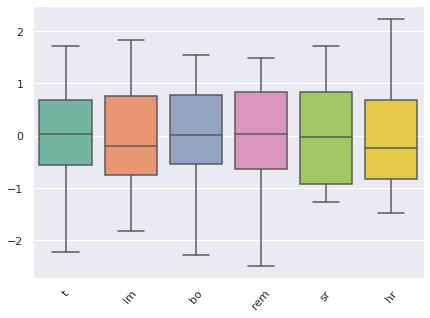

In [20]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50);

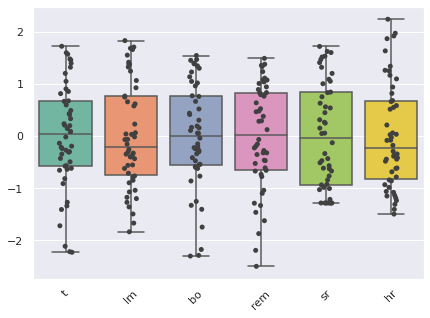

In [21]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

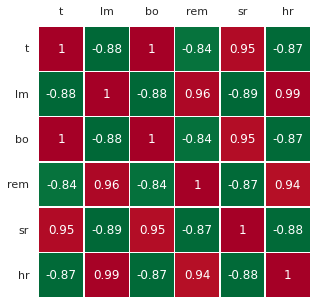

In [22]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

### **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

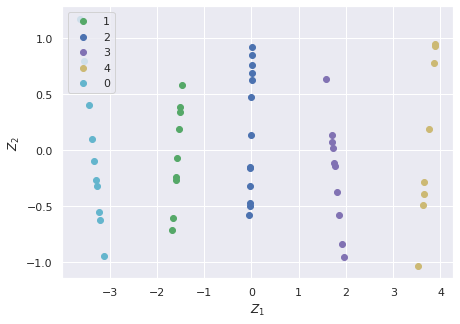

In [23]:
pca = PCA()
pca.fit(X)
Z = pca.fit_transform(X)      
idx_1 = np.where(y == 1)
idx_2 = np.where(y == 2)
idx_3 = np.where(y == 3)
idx_4 = np.where(y == 4)
idx_0 = np.where(y == 0)

plt. figure()

plt.scatter(Z[idx_1,0], Z[idx_1,1], c='g', label='1')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='b', label='2')
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='m', label='3')
plt.scatter(Z[idx_4,0], Z[idx_4,1], c='y', label='4')
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='c', label='0')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

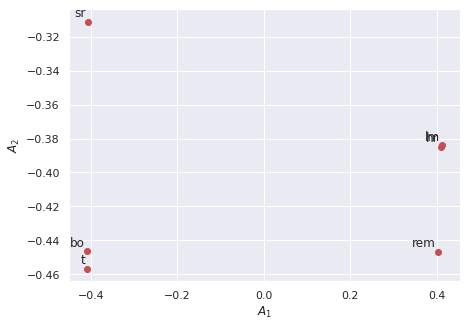

In [24]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

In [25]:
A

array([[-0.4085741 , -0.45682828, -0.22707594,  0.20763045,  0.08732205,
        -0.72254834],
       [ 0.41308514, -0.38386616,  0.22348181,  0.08566514,  0.78820861,
         0.05875368],
       [-0.40841731, -0.44655605, -0.24932107,  0.32452553, -0.01889592,
         0.68260393],
       [ 0.40257785, -0.44684396, -0.51336786, -0.56947582, -0.2230617 ,
         0.02560775],
       [-0.40765126, -0.31116272,  0.62507914, -0.58305287, -0.05596949,
         0.05648944],
       [ 0.40911452, -0.38477347,  0.42668597,  0.42424157, -0.5637871 ,
        -0.06838835]])

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


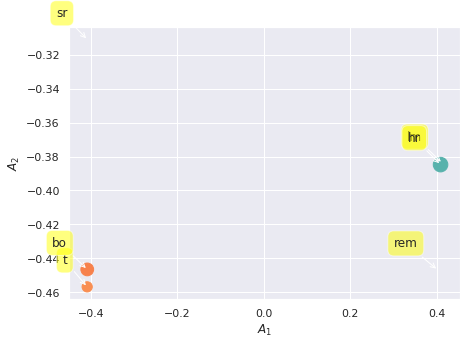

In [26]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**



Text(0, 0.5, 'Explained variance')

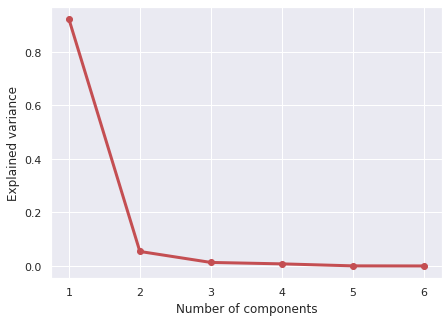

In [27]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [57]:
for i in x:
  print(Lambda[i-1])

5.652304245109918
0.33313455965700983
0.0819771892509971
0.04944211890156173
0.003784045290614861
0.0018068213817314842


**Explained Variance**



Text(0, 0.5, 'Cumulative explained variance')

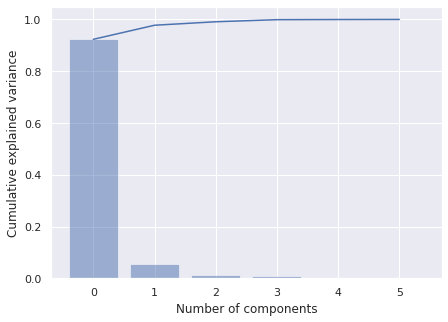

In [28]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

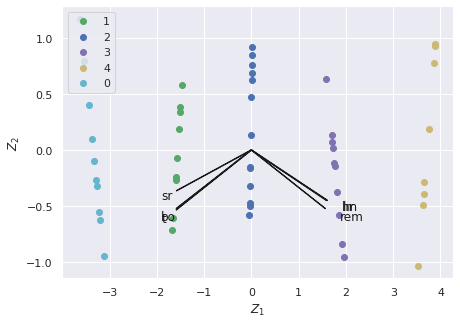

In [29]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='g', label='1')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='b', label='2')
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='m', label='3')
plt.scatter(Z[idx_4,0], Z[idx_4,1], c='y', label='4')
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='c', label='0')
plt.legend(loc='upper left')


## Using PCA Library


In [30]:
!pip install pca


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=26be69ede246602950fec1612c400a5eb1ab467239dcdd90de9d4bd5b6212ce5
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [31]:
X.head(1)

,t,lm,bo,rem,sr,hr
0,-0.344049,1.248086,-0.337591,1.01197,-0.66808,1.098917


In [32]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**



In [33]:
out['PC']


,PC1,PC2
0,1.923336,-0.838318
1,1.863064,-0.578185
2,-1.670859,-0.711401
3,1.698987,0.129957
4,-3.321757,-0.102362
5,-1.602316,-0.265730
6,-3.439686,0.400644
7,-3.123804,-0.946692
8,-3.620792,1.173116
9,-1.572438,-0.071463


In [34]:
X.head()

,t,lm,bo,rem,sr,hr
0,-0.344049,1.248086,-0.337591,1.011970,-0.668080,1.098917
1,-0.427287,1.068666,-0.413435,0.946296,-0.764237,0.942722
2,0.858274,-0.396598,1.021284,-0.319762,1.054739,-0.441337
3,-0.653879,0.580244,-0.619900,0.767515,-1.025998,0.517525
4,1.399319,-1.269776,1.349943,-1.461767,1.471421,-1.187601


In [35]:
df.head()

,t,lm,bo,rem,sr,hr,sl
0,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.552,15.880,89.552,98.88,1.552,72.76,3
2,96.000,10.000,95.000,85.00,7.000,60.00,1
3,90.768,13.920,88.768,96.92,0.768,68.84,3
4,97.872,6.496,96.248,72.48,8.248,53.12,0


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe5334c24d0>)

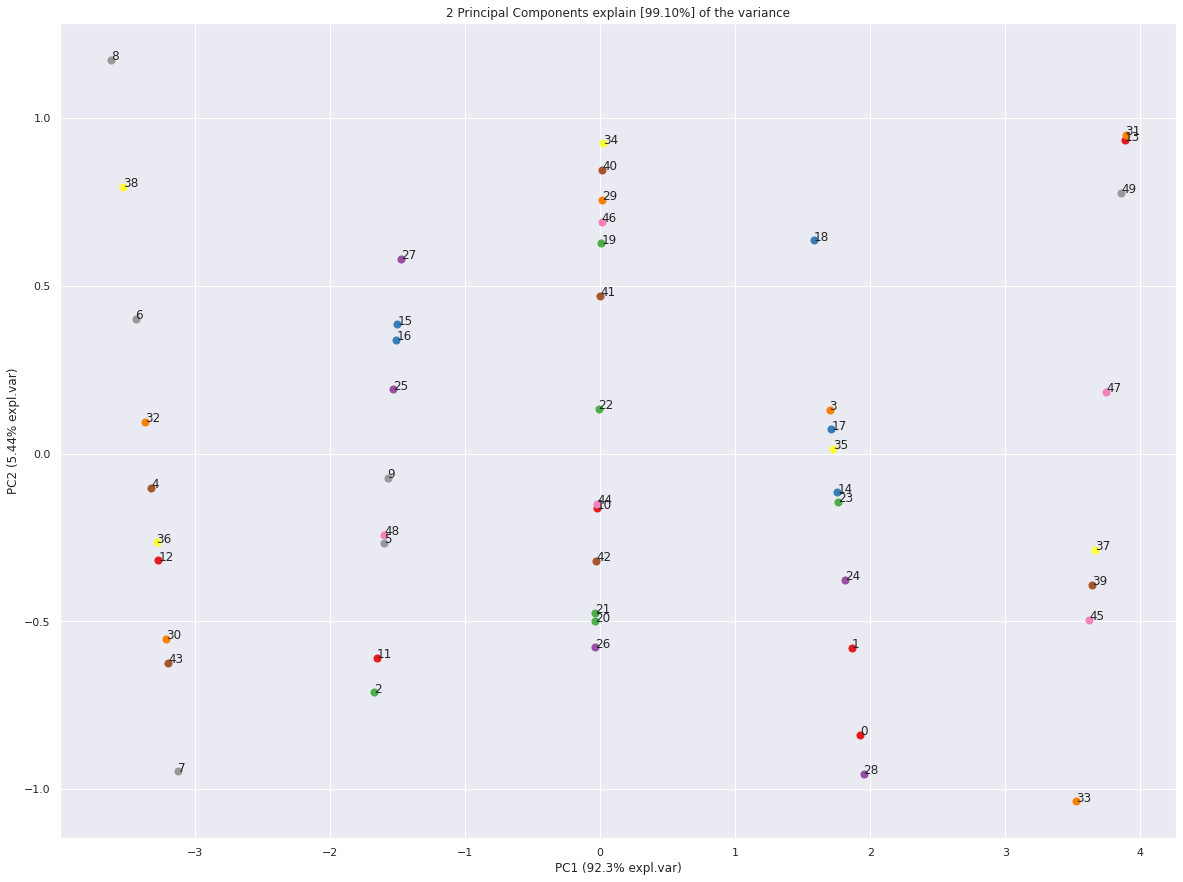

In [36]:
model.scatter(label=True, legend=False)

In [37]:
A = out['loadings'].T


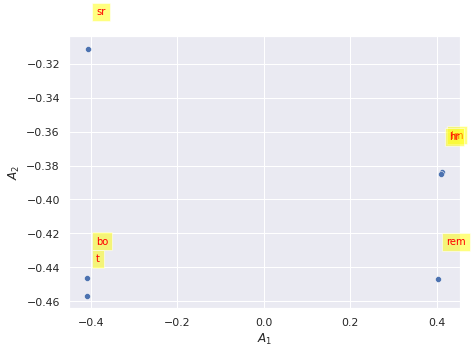

In [38]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

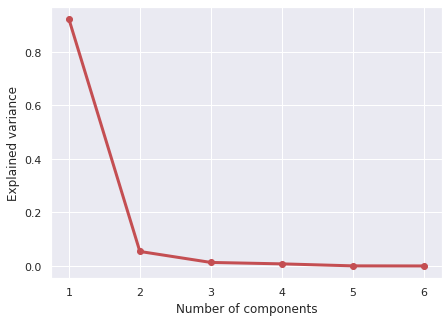

In [39]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

In [40]:
 out['variance_ratio']

array([9.23209693e-01, 5.44119781e-02, 1.33896076e-02, 8.07554609e-03,
       6.18060731e-04, 2.95114159e-04])

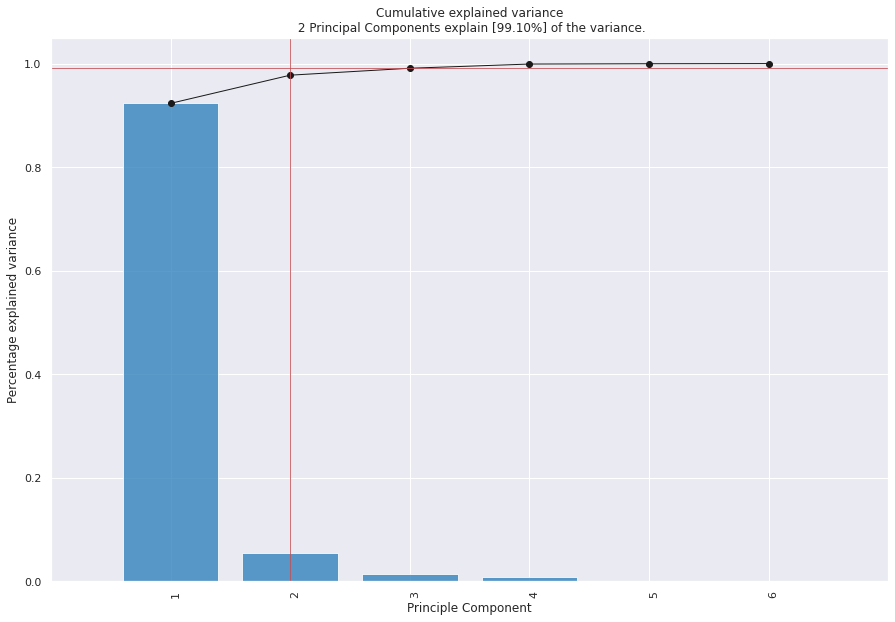

<Figure size 504x360 with 0 Axes>

In [41]:
model.plot();


[pca] >Plot PC1 vs PC2 with loadings.


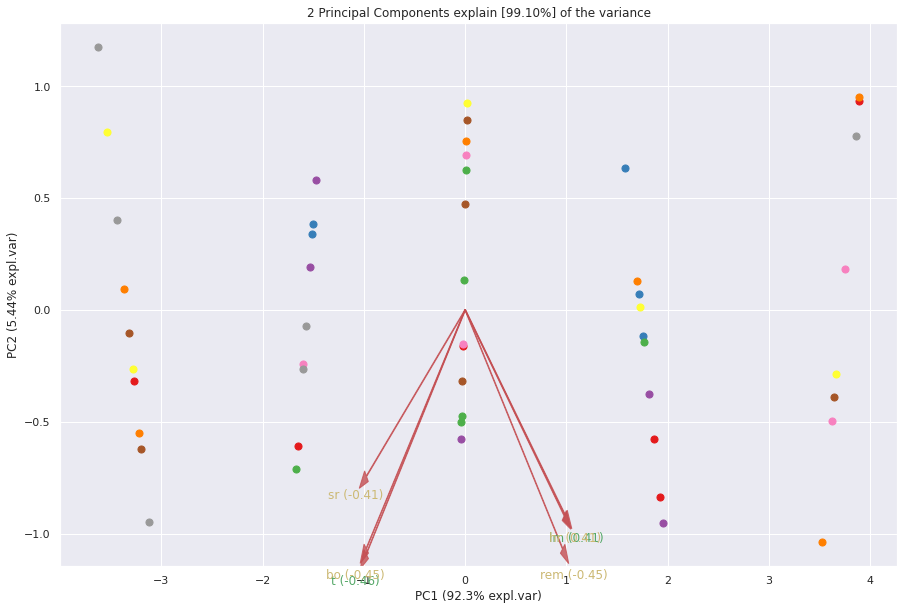

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe538bcf610>)

In [42]:
model.biplot(label=False, legend=False)


In [43]:
model.biplot3d(legend=False)


[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


(None, None)

In [45]:
from pycaret.utils import enable_colab 
enable_colab()

ModuleNotFoundError: ignored

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='sl', train_size=0.7, session_id=123)

In [ ]:
#show the best model and their statistics
best = compare_models()


In [ ]:
df.head(2)

In [ ]:
print(best)

